# Practical Question 4

## 4.a. Name of chosen book:
We've chosen the book "Alice in Wonderland" by Lewis Carroll.

## 4.b. Tokenization and Counting Words:

### 4.b.1. Read Document
We've downloaded the book "Alice in Wonderland" from Project Gutenberg and saved it as a utf-8 encoded text file, so we can read the content of the book using open().

In [199]:
def read_document(file_path: str) -> str:
    """
    Read document from given file path.
    :param file_path: The path to the document, including the file's name and extension.
    :return: The content of the document.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        return file.read()

In [200]:
FILE_PATH = 'alice_in_wonderland.txt'
print(f"Reading document from file path: {FILE_PATH}")
document = read_document(FILE_PATH)
print(f"Read document with {len(document)} characters!")

CHAR_COUNT = 1000
print(f"First {CHAR_COUNT} characters of the document: {document[:CHAR_COUNT]}...")

Reading document from file path: alice_in_wonderland.txt
Read document with 163918 characters!
First 1000 characters of the document: ﻿The Project Gutenberg eBook of Alice's Adventures in Wonderland
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Alice's Adventures in Wonderland

Author: Lewis Carroll

Release date: June 27, 2008 [eBook #11]
                Most recently updated: February 4, 2024

Language: English

Credits: Arthur DiBianca and David Widger


*** START OF THE PROJECT GUTENBERG EBOOK ALICE'S ADVENTURES IN WONDERLAND ***
[Illustration]




Alice’s Adventures in Wonderlan

### 4.b.2. Clean Document
We've noticed that the document contains a header and a footer that we don't need for our analysis, so we'll remove them using regular expressions. \
Also, The document contains a lot of special characters and new lines that we don't need for our analysis, so we'll remove them using regular expressions as well.

In [201]:
import re

def remove_header_and_footer(document: str, header: str=None, footer: str=None) -> str:
    """
    Remove header and footer from the document.
    :param document: The content of the document.
    :param header: A regex pattern to identify the header.
    :param footer: A regex pattern to identify the footer.
    :return: The content of the document without header and footer.
    """
    if header is not None:
        header_end = re.search(header, document)
        if header_end is not None:
            document = document[header_end.end():]

    if footer is not None:
        footer_start = re.search(footer, document)
        if footer_start is not None:
            document = document[:footer_start.start()]

    return document

In [202]:
print(f"Removing header and footer from the document...")
# HEADER = r'\*\*\* START OF THE PROJECT GUTENBERG [^\*]+\*\*\*'
HEADER = r'Alice’s Evidence'
FOOTER = r'\*\*\* END OF THE PROJECT GUTENBERG [^\*]+\*\*\*'
document_body = remove_header_and_footer(document, HEADER, FOOTER)
print(f"Removed {len(document) - len(document_body)} characters from the document!")

print(f"First {CHAR_COUNT} characters without header and footer: {document_body[:CHAR_COUNT]}...")

Removing header and footer from the document...
Removed 19894 characters from the document!
First 1000 characters without header and footer: 




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure of
making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so _very_ remarkable in that; nor did Alice think it
so _very_ much out of the way to hear the Rabbit say to itself, “Oh
dear! Oh dear! I shall be late!” (when she thought it over afterwards,
it occurred to 

In [203]:
def clean_document(document: str) -> str:
    """
    Clean document by removing special characters and new lines.
    Punctuation is kept for nltk's sentence tokenizer.
    :param document: The content of the document.
    :return: The cleaned content of the document.
    """
    document = re.sub(r'\s+', ' ', document)              # Replace extra spaces
    document = re.sub(r'-', ' ', document)                # Separate hyphenated words
    document = re.sub(r'[^\w\s.,!?;]', '', document)      # Remove special characters except punctuation
    return document

In [204]:
print(f"Cleaning document...")
cleaned_document_body = clean_document(document_body)
print(f"Cleaned {len(document_body) - len(cleaned_document_body)} characters from the document!")
print(f"Document now has {len(cleaned_document_body)} characters left!")

print(f"First {CHAR_COUNT} characters: {cleaned_document_body[:CHAR_COUNT]}...")

Cleaning document...
Cleaned 5072 characters from the document!
Document now has 138952 characters left!
First 1000 characters:  CHAPTER I. Down the Rabbit Hole Alice was beginning to get very tired of sitting by her sister on the bank, and of having nothing to do once or twice she had peeped into the book her sister was reading, but it had no pictures or conversations in it, and what is the use of a book, thought Alice without pictures or conversations? So she was considering in her own mind as well as she could, for the hot day made her feel very sleepy and stupid, whether the pleasure of making a daisy chain would be worth the trouble of getting up and picking the daisies, when suddenly a White Rabbit with pink eyes ran close by her. There was nothing so _very_ remarkable in that; nor did Alice think it so _very_ much out of the way to hear the Rabbit say to itself, Oh dear! Oh dear! I shall be late! when she thought it over afterwards, it occurred to her that she ought to have wond

### 4.b.3 Tokenize Document
We'll tokenize the document into sentences using nltk's sent_tokenize(), and into words using nltk's word_tokenize().

In [205]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')

def tokenize_document(document: str) -> [[str]]:
    """
    Tokenize document into a list of tokenized sentences.
    :param document: The content of the document.
    :return: A list of tokenized sentences.
    """
    sentences = sent_tokenize(document)
    tokenized_sentences = []
    for sentence in sentences:
        words = word_tokenize(sentence)
        words = [word for word in words if word.isalnum()]      # Remove punctuation
        if len(words) > 0:
            tokenized_sentences.append(words)
    return tokenized_sentences

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\idobb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [206]:
print(f"Tokenizing document...")
tokenized_document_body = tokenize_document(cleaned_document_body)
print(f"Tokenized document into {len(tokenized_document_body)} sentences!")

SENTENCE_COUNT = 10
print(f"First {SENTENCE_COUNT} tokenized sentences:")
for index, sentence in enumerate(tokenized_document_body[:SENTENCE_COUNT]):
    print(f"\t{index + 1}: {sentence}")

Tokenizing document...
Tokenized document into 1612 sentences!
First 10 tokenized sentences:
	1: ['CHAPTER', 'I']
	2: ['Down', 'the', 'Rabbit', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', 'thought', 'Alice', 'without', 'pictures', 'or', 'conversations']
	3: ['So', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', 'as', 'well', 'as', 'she', 'could', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisy', 'chain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting', 'up', 'and', 'picking', 'the', 'daisies', 'when', 'suddenly', 'a',

### 4.b.4 Count Words
We can count the frequency of words in the tokenized sentences using Python's Counter.

In [207]:
from collections import Counter

def count_words(tokenized_sentences: [[str]]) -> Counter:
    """
    Count the frequency of words in tokenized sentences.
    :param tokenized_sentences: A list of tokenized sentences.
    :return: A Counter of words.
    """
    word_counts = Counter()

    for sentence in tokenized_sentences:
        word_counts.update(sentence)

    return word_counts

In [208]:
print(f"Counting words for tokenized document...")
tokenized_body_word_counts = count_words(tokenized_document_body)
print(f"Counted {len(tokenized_body_word_counts)} words in tokenized document!\n")

WORD_COUNT = 20
base_step_most_common = tokenized_body_word_counts.most_common(WORD_COUNT)

print(f"Top {WORD_COUNT} words in tokenized document:")
print(f"\t   {'Word'.ljust(7)} | Count")
for index, (word, count) in enumerate(base_step_most_common):
    print(f"\t{index + 1}: {word.ljust(7)} | {count}")


Counting words for tokenized document...
Counted 2988 words in tokenized document!

Top 20 words in tokenized document:
	   Word    | Count
	1: the     | 1526
	2: and     | 781
	3: to      | 724
	4: a       | 613
	5: of      | 499
	6: she     | 499
	7: it      | 484
	8: said    | 456
	9: Alice   | 385
	10: I       | 384
	11: in      | 355
	12: was     | 351
	13: you     | 308
	14: that    | 257
	15: as      | 246
	16: her     | 244
	17: at      | 199
	18: on      | 189
	19: had     | 178
	20: with    | 176


### 4.b.5 Plot Word Counts
We can plot the frequency of words in the tokenized sentences using matplotlib and numpy.

In [209]:
import matplotlib.pyplot as plt
import numpy as np

def plot_word_counts(word_counts: Counter, top_n: int=5):
    """
    Plot the frequency of words.
    :param word_counts: A Counter of all words.
    :param top_n: The number of top words to annotate.
    :return: None. The plot will be displayed.
    """

    sorted_word_counts = word_counts.most_common()
    ranks = np.arange(1, len(sorted_word_counts) + 1)
    counts = np.array([count for _, count in sorted_word_counts])
    words = []
    for i, (word, _) in enumerate(sorted_word_counts):
        if i >= top_n:
            break

        words.append(word)

    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, counts, marker='.', linestyle='None')
    for (rank, count, word) in zip(ranks, counts, words):
        plt.annotate(word, (rank, count), textcoords="offset points", xytext=(0, 5), ha='center')
    plt.title('Word Counts Plot using Log-Log Scale')
    plt.xlabel('Log(Rank)')
    plt.ylabel('Log(Count)')
    plt.grid(True)
    plt.show()

Plotting word counts for tokenized document...


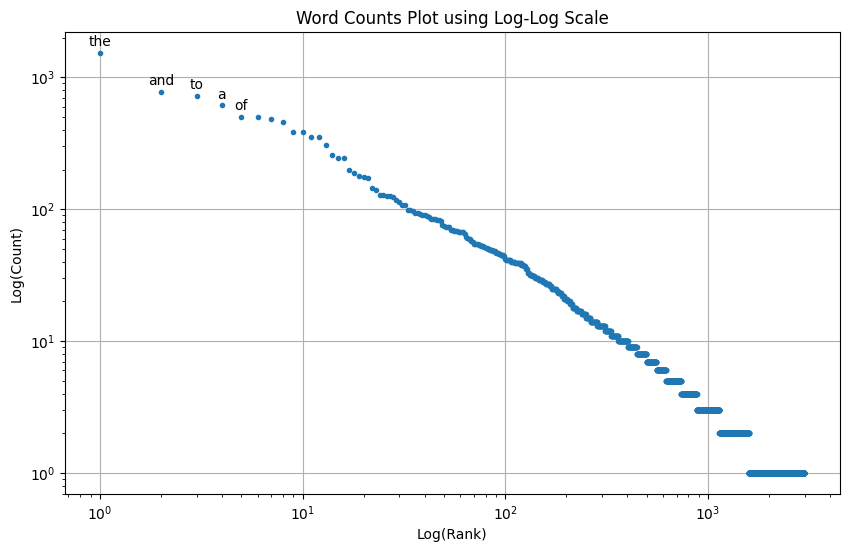

In [210]:
print(f"Plotting word counts for tokenized document...")
plot_word_counts(tokenized_body_word_counts)

## 4.c. A List of Top 20 Words:

In [211]:
WORD_COUNT = 20
print(f"Top {WORD_COUNT} words in tokenized document:")
print(f"\t   {'Word'.ljust(7)} | Count")
for index, (word, count) in enumerate(base_step_most_common):
    print(f"\t{index + 1}: {word.ljust(7)} | {count}")

Top 20 words in tokenized document:
	   Word    | Count
	1: the     | 1526
	2: and     | 781
	3: to      | 724
	4: a       | 613
	5: of      | 499
	6: she     | 499
	7: it      | 484
	8: said    | 456
	9: Alice   | 385
	10: I       | 384
	11: in      | 355
	12: was     | 351
	13: you     | 308
	14: that    | 257
	15: as      | 246
	16: her     | 244
	17: at      | 199
	18: on      | 189
	19: had     | 178
	20: with    | 176


## 4.d. Most Common Words Excluding Stopwords:

### 4.d.1 Remove Stopwords
We'll remove stopwords from the tokenized sentences using nltk's stopwords.

In [212]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def remove_stopwords(tokenized_sentences: [[str]]) -> [[str]]:
    """
    Remove stopwords from tokenized sentences.
    :param tokenized_sentences: A list of tokenized sentences.
    :return: A list of tokenized sentences without stopwords.
    """
    stop_words = set(stopwords.words('english'))
    clean_sentences = []

    for sentence in tokenized_sentences:
        clean_sentence = [word for word in sentence if word not in stop_words]
        if len(clean_sentence) > 0:
            clean_sentences.append(clean_sentence)

    return clean_sentences

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\idobb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
print(f"Removing stopwords...")
count_with_stopwords = sum([len(sentence) for sentence in tokenized_document_body])
stopword_free_tokenized_body = remove_stopwords(tokenized_document_body)
count_without_stopwords = sum([len(sentence) for sentence in stopword_free_tokenized_body])
print(f"Removed {count_with_stopwords - count_without_stopwords} stopwords from tokenized document!")
print(f"Tokenized document now has {count_without_stopwords} words left!")

print(f"First {SENTENCE_COUNT} tokenized sentences without stopwords:")
for sentence in stopword_free_tokenized_body[:SENTENCE_COUNT]:
    print(f"\t{sentence}")

Removing stopwords...
Removed 12363 stopwords from tokenized document!
Tokenized document now has 13924 words left!
First 10 tokenized sentences without stopwords:
	['CHAPTER', 'I']
	['Down', 'Rabbit', 'Hole', 'Alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', 'use', 'book', 'thought', 'Alice', 'without', 'pictures', 'conversations']
	['So', 'considering', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepy', 'stupid', 'whether', 'pleasure', 'making', 'daisy', 'chain', 'would', 'worth', 'trouble', 'getting', 'picking', 'daisies', 'suddenly', 'White', 'Rabbit', 'pink', 'eyes', 'ran', 'close']
	['There', 'nothing', 'remarkable', 'Alice', 'think', 'much', 'way', 'hear', 'Rabbit', 'say', 'Oh', 'dear']
	['Oh', 'dear']
	['I', 'shall', 'late']
	['thought', 'afterwards', 'occurred', 'ought', 'wondered', 'time', 'seemed', 'quite', 'natural', 'Rabbit', 'actually', 'watch', 'waistcoa

### 4.d.2 Print Most Common Words and Plot Word Counts

Counting words without stopwords...
Counted 2865 words in tokenized document!

Top 20 words after removing stopwords:
	   Word    | Count
	1: said    | 456
	2: Alice   | 385
	3: I       | 384
	4: little  | 125
	5: The     | 107
	6: one     | 92
	7: know    | 85
	8: like    | 84
	9: went    | 83
	10: thought | 74
	11: could   | 74
	12: would   | 70
	13: time    | 68
	14: And     | 67
	15: Queen   | 67
	16: see     | 65
	17: King    | 59
	18: began   | 57
	19: Mock    | 56
	20: way     | 55


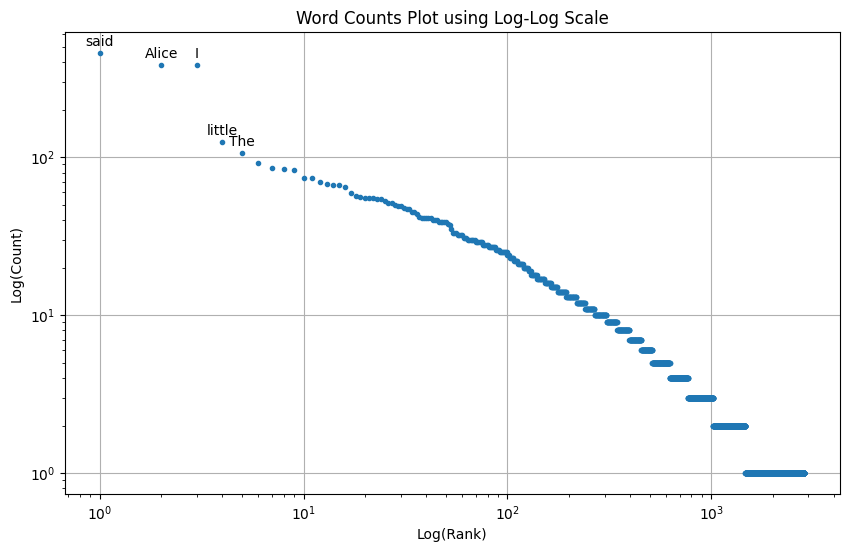

In [214]:
print(f"Counting words without stopwords...")
stopword_free_word_counts = count_words(stopword_free_tokenized_body)
print(f"Counted {len(stopword_free_word_counts)} words in tokenized document!\n")

stopword_step_most_common = stopword_free_word_counts.most_common(WORD_COUNT)

print(f"Top {WORD_COUNT} words after removing stopwords:")
print(f"\t   {'Word'.ljust(7)} | Count")
for index, (word, count) in enumerate(stopword_step_most_common):
    print(f"\t{index + 1}: {word.ljust(7)} | {count}")
    
plot_word_counts(stopword_free_word_counts)

## 4.e. Most Common Words after Stemming:

### 4.e.1. Stem Words
We'll stem the words using nltk's PorterStemmer.

In [215]:
from nltk.stem import PorterStemmer
# note: nltk's stemming doesn't need to be downloaded, unlike stopwords and punkt.

def stem_words(tokenized_sentences: [[str]]) -> [[str]]:
    """
    Stem words in tokenized sentences.
    :param tokenized_sentences: A list of tokenized sentences.
    :return: A list of tokenized sentences with stemmed words.
    """
    stemmer = PorterStemmer()
    stemmed_sentences = []

    for sentence in tokenized_sentences:
        stemmed_sentence = [stemmer.stem(word) for word in sentence]
        stemmed_sentences.append(stemmed_sentence)

    return stemmed_sentences

In [216]:
print(f"Stemming words...")
stemmed_tokenized_body = stem_words(stopword_free_tokenized_body)
print(f"Stemmed {count_without_stopwords} words in tokenized document!")

print(f"First {SENTENCE_COUNT} tokenized sentences with stemmed words:")
for index, sentence in enumerate(stemmed_tokenized_body[:SENTENCE_COUNT]):
    print(f"\t{index + 1}: {sentence}")

Stemming words...
Stemmed 13924 words in tokenized document!
First 10 tokenized sentences with stemmed words:
	1: ['chapter', 'i']
	2: ['down', 'rabbit', 'hole', 'alic', 'begin', 'get', 'tire', 'sit', 'sister', 'bank', 'noth', 'twice', 'peep', 'book', 'sister', 'read', 'pictur', 'convers', 'use', 'book', 'thought', 'alic', 'without', 'pictur', 'convers']
	3: ['so', 'consid', 'mind', 'well', 'could', 'hot', 'day', 'made', 'feel', 'sleepi', 'stupid', 'whether', 'pleasur', 'make', 'daisi', 'chain', 'would', 'worth', 'troubl', 'get', 'pick', 'daisi', 'suddenli', 'white', 'rabbit', 'pink', 'eye', 'ran', 'close']
	4: ['there', 'noth', 'remark', 'alic', 'think', 'much', 'way', 'hear', 'rabbit', 'say', 'oh', 'dear']
	5: ['oh', 'dear']
	6: ['i', 'shall', 'late']
	7: ['thought', 'afterward', 'occur', 'ought', 'wonder', 'time', 'seem', 'quit', 'natur', 'rabbit', 'actual', 'watch', 'waistcoat', 'look', 'hurri', 'alic', 'start', 'feet', 'flash', 'across', 'mind', 'never', 'seen', 'rabbit', 'either'

### 4.e.2. Print Most Common Words and Plot Word Counts

Counting words after stemming...
Counted 2044 words after stemming!

Top 20 words after stemming:
	   Word    | Count
	1: said    | 460
	2: alic    | 395
	3: i       | 384
	4: littl   | 126
	5: the     | 109
	6: look    | 106
	7: one     | 100
	8: like    | 97
	9: know    | 89
	10: went    | 83
	11: thought | 80
	12: would   | 78
	13: thing   | 78
	14: time    | 77
	15: go      | 77
	16: queen   | 76
	17: could   | 74
	18: say     | 69
	19: get     | 68
	20: and     | 68


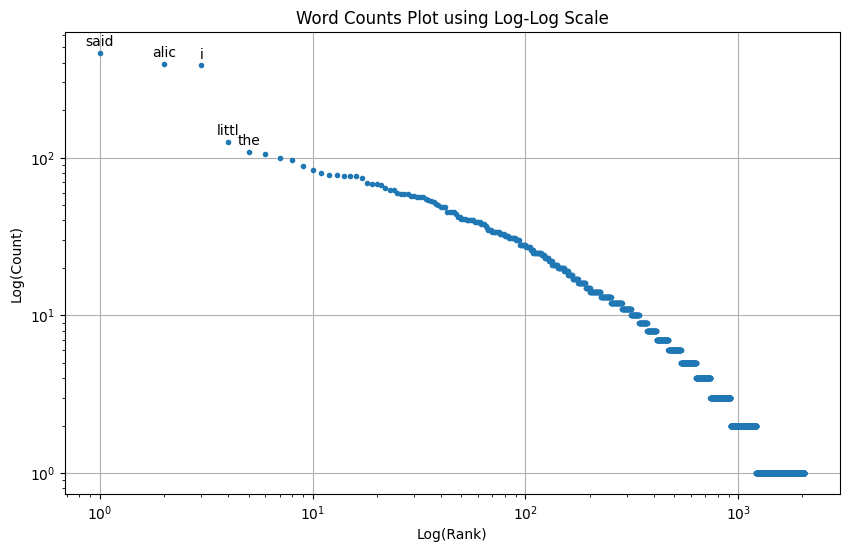

In [217]:
print(f"Counting words after stemming...")
stemmed_word_counts = count_words(stemmed_tokenized_body)
print(f"Counted {len(stemmed_word_counts)} words after stemming!\n")

stemming_step_most_common = stemmed_word_counts.most_common(WORD_COUNT)

print(f"Top {WORD_COUNT} words after stemming:")
print(f"\t   {'Word'.ljust(7)} | Count")
for index, (word, count) in enumerate(stemming_step_most_common):
    print(f"\t{index + 1}: {word.ljust(7)} | {count}")

plot_word_counts(stemmed_word_counts)

## 4.e.3. Explanation for the Differences in the Plots:
- Base tokenized document: Stopwords dominate the frequency of words, causing a steep curve in the plot and a long tail.
- Stopword-free tokenized document: The frequency of words is more evenly distributed, with a shallower curve and a shorter tail.
- Stemmed tokenized document: The frequency of words is further reduced, with a shallower curve and a shorter tail.
Overall, stopword-removal and Stemming allowed us to even out the frequency of words and reduce the noise in the data.

## 4.f. Example of Incorrect POS Tagging:


### 4.f.1. Part-of-Speech Tagging
We can perform Part-of-Speech (POS) tagging on the tokenized sentences using nltk's pos_tag().

In [218]:
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def pos_tag_sentences(tokenized_sentences: [[str]]) -> [[(str, str)]]:
    """
    Perform Part-of-Speech tagging on the tokenized sentences.
    :param tokenized_sentences: A list of tokenized sentences.
    :return: A list of POS-tagged sentences.
    """
    return [pos_tag(sentence) for sentence in tokenized_sentences]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\idobb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\idobb\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [219]:
print(f"POS tagging tokenized sentences...")
tagged_sentences = pos_tag_sentences(tokenized_document_body)
print(f"POS tagged {len(tagged_sentences)} sentences!\n")

SENTENCE_COUNT = 20
print(f"First {SENTENCE_COUNT} tagged sentences:")
for index, sentence in enumerate(tagged_sentences[:SENTENCE_COUNT]):
    print(f"{index + 1} : {sentence}\n")

POS tagging tokenized sentences...
POS tagged 1612 sentences!

First 20 tagged sentences:
1 : [('CHAPTER', 'NN'), ('I', 'PRP')]

2 : [('Down', 'IN'), ('the', 'DT'), ('Rabbit', 'NNP'), ('Hole', 'NNP'), ('Alice', 'NNP'), ('was', 'VBD'), ('beginning', 'VBG'), ('to', 'TO'), ('get', 'VB'), ('very', 'RB'), ('tired', 'JJ'), ('of', 'IN'), ('sitting', 'VBG'), ('by', 'IN'), ('her', 'PRP$'), ('sister', 'NN'), ('on', 'IN'), ('the', 'DT'), ('bank', 'NN'), ('and', 'CC'), ('of', 'IN'), ('having', 'VBG'), ('nothing', 'NN'), ('to', 'TO'), ('do', 'VB'), ('once', 'RB'), ('or', 'CC'), ('twice', 'VB'), ('she', 'PRP'), ('had', 'VBD'), ('peeped', 'VBN'), ('into', 'IN'), ('the', 'DT'), ('book', 'NN'), ('her', 'PRP$'), ('sister', 'NN'), ('was', 'VBD'), ('reading', 'VBG'), ('but', 'CC'), ('it', 'PRP'), ('had', 'VBD'), ('no', 'DT'), ('pictures', 'NNS'), ('or', 'CC'), ('conversations', 'NNS'), ('in', 'IN'), ('it', 'PRP'), ('and', 'CC'), ('what', 'WP'), ('is', 'VBZ'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('

## 4.f.2. Incorrect POS Tagging Example:
Tokenized Sentence: ['Oh', 'dear'] (Fourth sentence) \
Tags:               ['UH', 'NN'] \
Expected Tags:      ['UH', 'UH'] \
Explanation: "Oh dear!" is an interjection, a word used to express emotion, and therefore both "Oh" and "dear" should be tagged as UH(Corresponding Penn's Treebank-tag for interjection). \
However, the word "dear" is incorrectly tagged as NN (Noun, singular or mass).

# 4.g. Plot Word Cloud of Proper Nouns

### 4.g.1. Extract Proper Nouns
We'll extract proper noun by filtering the tagged sentences for words with the tags 'NNP' (Proper noun, singular) and 'NNPS' (Proper noun, plural).

In [220]:
def extract_proper_nouns(tagged_sentences):
    """
    Extract proper nouns from tagged sentences.
    :param tagged_sentences: A list of POS-tagged sentences.
    :return: A list of proper nouns.
    """
    proper_nouns = []
    for sentence in tagged_sentences:
        for word, tag in sentence:
            if tag in ('NNP', 'NNPS'):
                proper_nouns.append(word)
    return proper_nouns

In [221]:
print(f"Extracting proper nouns from tagged sentences...")
proper_nouns = extract_proper_nouns(tagged_sentences)
print(f"Extracted {len(proper_nouns)} proper nouns!")

PROPER_NOUN_COUNT = 20
print(f"First {PROPER_NOUN_COUNT} proper nouns:")
for index, noun in enumerate(proper_nouns[:PROPER_NOUN_COUNT]):
    print(f"\t{index + 1}: {noun}")

Extracting proper nouns from tagged sentences...
Extracted 1637 proper nouns!
First 20 proper nouns:
	1: Rabbit
	2: Hole
	3: Alice
	4: Alice
	5: White
	6: Alice
	7: Rabbit
	8: Rabbit
	9: Alice
	10: Alice
	11: Alice
	12: ORANGE
	13: MARMALADE
	14: Alice
	15: Ive
	16: Alice
	17: Latitude
	18: Longitude
	19: Ive
	20: Alice


### 4.g.2. Plot Word Cloud
We can plot a word cloud of the most frequent proper nouns using the wordcloud library.

In [222]:
from wordcloud import WordCloud

def plot_word_cloud(proper_nouns: [str]):
    """
    Plot a word cloud of the most frequent proper nouns.
    :param proper_nouns: A list of proper nouns.
    :return: None. The plot will be displayed.
    """
    proper_nouns_counts = Counter(proper_nouns)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(proper_nouns_counts)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Proper Nouns')
    plt.show()


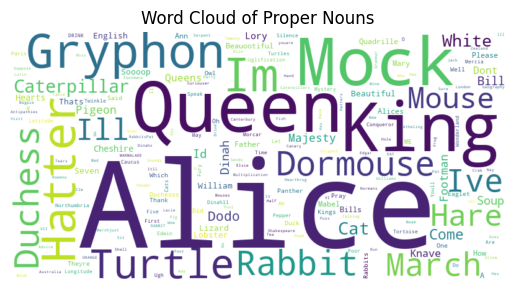

Top 5 most frequent proper nouns:
	'Alice' appears 376 times.
	'Queen' appears 63 times.
	'King' appears 58 times.
	'Mock' appears 56 times.
	'Gryphon' appears 55 times.


In [223]:
plot_word_cloud(proper_nouns)

TOP_PROPER_NOUNS_COUNT = 5
proper_nouns_counts = Counter(proper_nouns)
print(f"Top {TOP_PROPER_NOUNS_COUNT} most frequent proper nouns:")
for noun, count in proper_nouns_counts.most_common(TOP_PROPER_NOUNS_COUNT):
    print(f"\t'{noun}' appears {count} times.")

## 4.g.3. Explanation - Top Proper Nouns relevance to the book's narrative: 
Answer: The top proper nouns and their frequencies do correspond well with what is known about the book. \
Explanation: The main character is Alice, therefore it is the most prevalent Proper Noun.\
 Following Alice, the Queen and the King are Key characters in the story. \ 
 At last, the presence of "Mock" and "Gryphon" aligns with their roles in the narrative.

## 4.h. Find Repeated Words

### 4.h.1. Choosing the pattern:

In [224]:
# We'll use the pattern \b([a-zA-Z]+)\b[\s,.;!?]*\b\1\b:
# - \b([a-zA-Z]+)\b: Match a word and capture it in a group.
# - [\s,.;!?]*: Match any number of optional spaces or punctuation characters between the words.
# - \b\1\b: Match the same word as the first group.

## 4.h.2. Get Overlapping Matches
We can find repeated words in the document using re.

In [225]:
def find_overlapping_matches(document: str, pattern: re.Pattern) -> [str]:
    """
    Find overlapping matches in the document using the pattern.
    :param document: The content of the document.
    :param pattern: The regex pattern to match.
    :return: A list of matches.
    """
    matches: [re.Match] = []
    search_start = 0
    
    # Using a while loop for "jumping" index:
    while search_start < len(document):
        match = pattern.search(document, search_start)
        if match is None:
            break
            
        matches.append(match)
        search_start = match.start() + 1
        
    return matches

### 4.h.3. Print Matches with Context

In [226]:
pattern = re.compile(r'\b([a-zA-Z]+)\b[\s.,!?]*\b\1\b', re.IGNORECASE)
matches = find_overlapping_matches(document, pattern)

# Print matches with context
print(f"Found: {len(matches)} repeated word matches!")
for match in matches:
    start, end = match.span()
    highlighted_match = f"\033[1;31m{match.group()}\033[0m"  # Highlight the match in red
    context = document[max(start - 30, 0):start] + highlighted_match + document[end:end + 30] # Get 30*2 characters around the match
    context = re.sub(r'\s+', ' ', context)  # Remove extra spaces
    print(f"Match: '{match.group()}'")
    print(f"Start: {start}")
    print(f"Context: {context}")
    print("-" * 50)

Found: 29 repeated word matches!
Match: 'Down, down'
Start: 4080
Context: Which was very likely true.) Down, down, down. Would the fall _never_
--------------------------------------------------
Match: 'down, down'
Start: 4086
Context: was very likely true.) Down, down, down. Would the fall _never_ come 
--------------------------------------------------
Match: 'Down, down'
Start: 5474
Context: ee it written up somewhere.” Down, down, down. There was nothing else
--------------------------------------------------
Match: 'down, down'
Start: 5480
Context: written up somewhere.” Down, down, down. There was nothing else to do
--------------------------------------------------
Match: 'thump! thump'
Start: 6366
Context: er eat a bat?” when suddenly, thump! thump! down she came upon a heap of
--------------------------------------------------
Match: 'Dear, dear'
Start: 15562
Context: he time she went on talking: “Dear, dear! How queer everything is to-d
---------------------------------------

## Bonus: Convert to PDF

In [227]:
!jupyter nbconvert --to pdf ex2.ipynb

[NbConvertApp] Converting notebook ex2.ipynb to pdf
[NbConvertApp] Support files will be in ex2_files\
[NbConvertApp] Making directory .\ex2_files
[NbConvertApp] Writing 103008 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 284993 bytes to ex2.pdf
